# Selection and Analysis of neutrino-Ar CCQE scattering with a single proton production
April 30, 2017

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/'

## GENIE features of the data-sample 

In [3]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %


In [4]:
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'in active volume',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsMuonReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsMuonReconstructed==True]
print len(GENIECC1pIsMuonReconstructed),'muon-track reconstructed',(100*float(len(GENIECC1pIsMuonReconstructed))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
# GENIECC1p_in_close_proximity = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['distance']<11]
# print len(GENIECC1p_in_close_proximity),'tracks with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_close_proximity))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
# print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

6365 in active volume 49.0520961776 %
4873 muon-track reconstructed 37.553945746 %
1167 tracks reconstructed 8.99352651048 %
757 tracks reconstructed and contained with a separation distance below 11 cm 5.83384710234 %


# what is the best identification method for The µ and the p?

In [46]:
Ntot = len(GENIECC1pIsVertexReconstructed)
mu_long = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['l_long']==GENIECC1pIsVertexReconstructed['l_muon']]
N_mu_long = len(mu_long)
frac_mu_long = float(N_mu_long)/Ntot
print 'µ is long in %.2f'%(100*frac_mu_long),'%'

p_long = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['l_long']==GENIECC1pIsVertexReconstructed['l_proton']]
N_p_long = len(p_long)
frac_p_long = float(N_p_long)/Ntot
print 'µ is long in %.2f'%(100*frac_p_long),'%'


mu_small_PIDa = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['l_small_pida']==GENIECC1pIsVertexReconstructed['l_muon']]
N_mu_small_PIDa = len(mu_small_PIDa)
frac_mu_small_PIDa = float(N_mu_small_PIDa)/Ntot
print 'µ with small PIDa in %.2f'%(100*frac_mu_small_PIDa),'%'


small_PIDa_long = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['l_small_pida']==GENIECC1pIsVertexReconstructed['l_long']]
N_small_PIDa_long = len(small_PIDa_long)
frac_small_PIDa_long = float(N_small_PIDa_long)/Ntot
print 'small PIDa = long in %.2f'%(100*frac_small_PIDa_long),'%'

mu_small_PIDa_long = GENIECC1pIsVertexReconstructed[(GENIECC1pIsVertexReconstructed['l_small_pida']==GENIECC1pIsVertexReconstructed['l_muon'])
                                                   & (GENIECC1pIsVertexReconstructed['l_long']==GENIECC1pIsVertexReconstructed['l_muon'])]
N_mu_small_PIDa_long = len(mu_small_PIDa_long)
frac_mu_small_PIDa_long = float(N_mu_small_PIDa_long)/Ntot
print 'µ with small PIDa and long in %.2f'%(100*frac_mu_small_PIDa_long),'%'

µ is long in 87.49 %
µ is long in 12.51 %
µ with small PIDa in 88.00 %
small PIDa = long in 78.06 %
µ with small PIDa and long in 76.78 %


### The CC1p pairs as a function of Ev

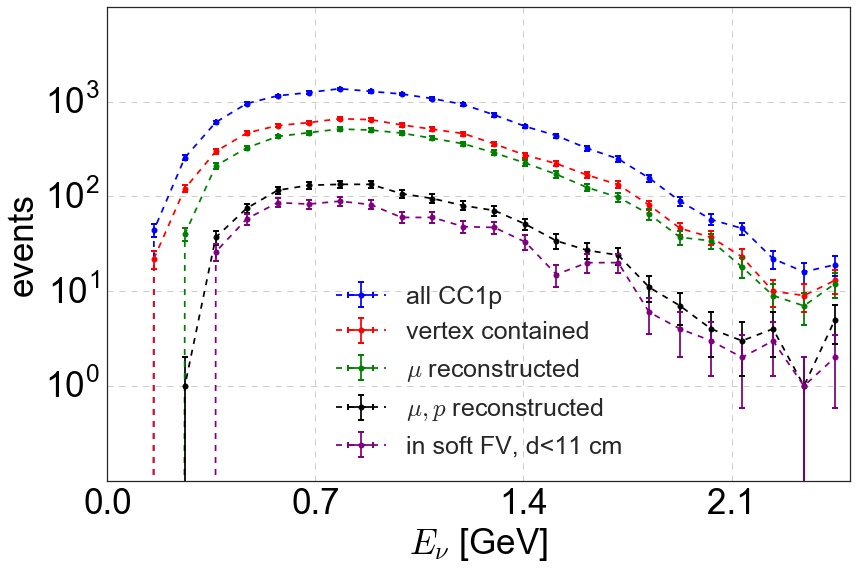

In [47]:
GENIEsamples = [GENIECC1p ,GENIECC1pIsVertexContained, GENIECC1pIsMuonReconstructed, GENIECC1pIsVertexReconstructed, GENIECC1p_in_FV_close_proximity]
GENIElabels = ['all CC1p', 'vertex contained' , '$\\mu$ reconstructed' , '$\\mu,p$ reconstructed' , 'in soft FV, d<11 cm']
GENIEcolors = ['blue' , 'red', 'green' , 'black' , 'purple']
fig,ax = plt.subplots(figsize=(12,8))#figures_size)
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(GENIEsamples,GENIElabels,GENIEcolors):
    h,bins,_=plt.hist(sample.truth_Ev,bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=markers_size, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=25)
ax.grid(linestyle='--',alpha=1.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=35)
ax.xaxis.set_ticks([0,0.7,1.4,2.1])
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'CC1pContributionInTheSampleEvBinned.pdf')

# 2-tracks clusters

In [48]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'

39881 2-tracks clusters from MC-BNB events + extBNB
25827 2-tracks clusters from MC-BNB events + extBNB in FV


In [54]:
MCBNBextBNB = MCBNBextBNB_in_FV
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[MCBNBextBNB.Is1mu1p==True]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.Non1mu1p==True) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'cosmic data' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

25827 2-tracks clusters from MC-BNB events + extBNB
685 are true (GENIE) cc1p,  2.65226313548 %
2558 are 2-tracks clusters of 1µ1p 9.90436365044 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


# non 1µ1p contributions

41.0 % µ-µ
17.8 % µ-π
19.7 % p-p
11.3 % π-p
5.0 % π-π
1.0 % µ-e/photon
non categorized 4.2


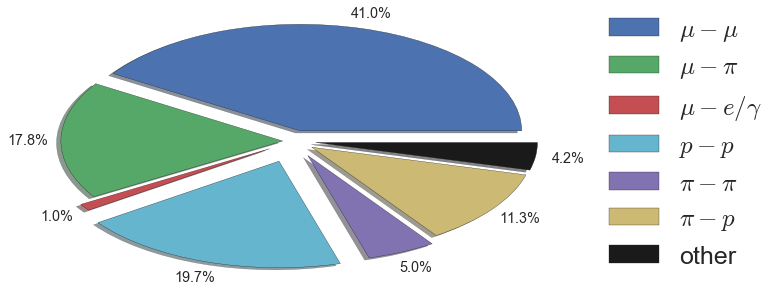

In [50]:
Background = samples[2] # reduced[2] # 
BackgroundMuonMuon = Background[Background.pdg_short*Background.pdg_long == 169]
print '%.1f'%(100.*float(len(BackgroundMuonMuon))/len(Background)),'% µ-µ'
BackgroundMuonPion = Background[np.abs(Background.pdg_short*Background.pdg_long) == 2743]
print '%.1f'%(100.*float(len(BackgroundMuonPion))/len(Background)),'% µ-π'
BackgroundProtonProton = Background[np.abs(Background.pdg_short*Background.pdg_long) == 4892944]
print '%.1f'%(100.*float(len(BackgroundProtonProton))/len(Background)),'% p-p'
BackgroundPionProton = Background[np.abs(Background.pdg_short*Background.pdg_long) == 466732]
print '%.1f'%(100.*float(len(BackgroundPionProton))/len(Background)),'% π-p'
BackgroundPionPion = Background[np.abs(Background.pdg_short*Background.pdg_long) == 44521]
print '%.1f'%(100.*float(len(BackgroundPionPion))/len(Background)),'% π-π'
BackgroundMuonEl = Background[(np.abs(Background.pdg_short*Background.pdg_long) == 143)|(np.abs(Background.pdg_short*Background.pdg_long) == 286)]
print '%.1f'%(100.*float(len(BackgroundMuonEl))/len(Background)),'% µ-e/photon'
lenOthers = len(Background) - (len(BackgroundMuonMuon) + len(BackgroundMuonPion) + len(BackgroundProtonProton) + len(BackgroundPionProton) + len(BackgroundPionPion) + len(BackgroundMuonEl))
FracOthers = 100.0 - 100.*float( len(BackgroundMuonMuon) + len(BackgroundMuonPion) + len(BackgroundProtonProton) + len(BackgroundPionProton) + len(BackgroundPionPion) + len(BackgroundMuonEl))/len(Background)
print 'non categorized %.1f'%FracOthers
# Background[['pdg']]
fig=plt.figure(figsize=figures_size)
explode = (0.1, 0.05, 0.13, 0.2,0.15,0.1,0.1)
bkg_labels=['$\mu-\mu$','$\mu-\pi$','$\mu-e/\gamma$','$p-p$','$\pi-\pi$','$\pi-p$','other']
patches, texts, autotexts = plt.pie(
    [len(BackgroundMuonMuon),len(BackgroundMuonPion),len(BackgroundMuonEl),len(BackgroundProtonProton),len(BackgroundPionPion),len(BackgroundPionProton),lenOthers],    
    pctdistance=1.15,
    explode=explode,autopct='%1.1f%%',shadow=True);
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=bkg_labels,fontsize=25)#,loc="best")
plt.tight_layout()
fig.savefig(figures_path+'pieChartBackgroundNon1mu1p.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [51]:
pureff_df = pd.DataFrame(columns=['cut','$\mu-p$ pur.','$\mu-p$ eff.','CC1p pur.','CC1p eff.'])

# samples_after_cuts = [sample for sample in samples]
reduced_samples = dict()
reduced_samples['no cuts'] = [sample for sample in samples]
# cut 1 
# ------------
# cuts on PIDa
print '------------'
print 'cut 1: PIDa(µ) vs PIDa(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['no cuts'],samples,labels):
    reduced = sample
    reduced = reduced[(((reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000))                               
                      &(reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton'])                     
                      &(reduced['PIDA_assigned_muon']>0))==False)]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 1'] = samples_after_cuts



# cut 2
# ------------
# lµ vs lp
print '------------'
print 'cut 2: l(µ) vs l(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 1'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['l_small_pida']>4]
    reduced=reduced[reduced['l_large_pida']<120]
    reduced=reduced[reduced['l_large_pida']>8]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 2'] = samples_after_cuts



# cut 3
# ------------
# no-collinearity: cut on angle between tracks
print '------------'
print 'cut 3: no-collinearity'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 2'],samples,labels):
    reduced = sample[np.abs(180./np.pi*sample['2_tracks_angle']-90)<60]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0),'%'
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 3'] = samples_after_cuts




# cut 4
# ------------
# Delta-Q
print '------------'
print 'cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 3'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 4'] = samples_after_cuts



# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 5: Delta-phi vs. theta_pq'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced=reduced[reduced['reco_CC1p_theta_pq_fromE']<25]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 5'] = samples_after_cuts





------------
cut 1: PIDa(µ) vs PIDa(p)
$\mu-\mu$ retained 94.7% in this cut (649)
$\mu-\pi$ retained 94.6% in this cut (2419)
$\mu-e/\gamma$ retained 59.1% in this cut (1896)
$p-p$ retained 23.0% in this cut (4463)
efficiency:94.7 , purity:6.9
mu-p eff.:94.6 , mu-p pur.:32.5
------------
cut 2: l(µ) vs l(p)
$\mu-\mu$ retained 77.8% in this cut (533)
$\mu-\pi$ retained 72.1% in this cut (1844)
$\mu-e/\gamma$ retained 43.9% in this cut (1409)
$p-p$ retained 14.7% in this cut (2848)
efficiency:77.8 , purity:8.0
mu-p eff.:73.3 , mu-p pur.:35.8
------------
cut 3: no-collinearity
$\mu-\mu$ retained 74.9% in this cut (513)
$\mu-\pi$ retained 65.7% in this cut (1681)
$\mu-e/\gamma$ retained 26.2% in this cut (840)
$p-p$ retained 2.8% in this cut (538)
efficiency:74.9 , purity:14.4 %
mu-p eff.:67.7 , mu-p pur.:61.4
------------
cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)
$\mu-\mu$ retained 67.2% in this cut (460)
$\mu-\pi$ retained 36.9% in this cut (944)
$\mu-e/\gamma$ retained 12.8% in

In [52]:
def do_graphical_cut(xy_pts,varx='x',vary='y'):
    '''
    input: 
    xy_pts array of points in (x,y) plane
    
    return: 
    lines for the cuts
    to plot them use
    for line in lines: plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    '''
    # create the boundary lines
    lines = []
    for i in range(1,len(xy_pts)):
        x_array,y_array = [xy_pts[i-1][0],xy_pts[i][0]],[xy_pts[i-1][1],xy_pts[i][1]]
        lines.append([x_array,y_array])
        
        #  show the boundary lines
        slope,intercept = find_a_straight_line(x_array,y_array)  
        print 'line ',[xy_pts[i-1][0],xy_pts[i-1][1]],'=>',[xy_pts[i][0],xy_pts[i][1]]
        if varx=='x' and vary=='y':
            print "y = %f*x + %f"%(slope,intercept)
        else:
            print "reduced=reduced[reduced['%s']=%f*reduced['%s']+(%f)]"%(vary,slope,varx,intercept)
    return lines

# Enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

## detection cuts

### PIDa 

In [11]:
reduced_this_cut,reduced_anti_cut,frac,frac_anti=[],[],[],[]
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    # triangle
    reduced = sample
    reduced=reduced[reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000)]
    reduced=reduced[reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton']+(0.000000)]
    reduced=reduced[reduced['PIDA_assigned_muon']>=0.]

    reduced_anti = sample
    reduced_anti=reduced_anti[((
                               (reduced_anti['PIDA_assigned_muon']<-2.000000*reduced_anti['PIDA_assigned_proton']+(22.000000))
                               &(reduced_anti['PIDA_assigned_muon']<1.142857*reduced_anti['PIDA_assigned_proton']+(0.000000))
                               &(reduced_anti['PIDA_assigned_muon']>0))==False)
                             ]
    # box
#     reduced = sample
#     reduced=reduced[reduced['PIDA_assigned_muon']>1]
#     reduced=reduced[reduced['PIDA_assigned_muon']<20]
#     reduced=reduced[reduced['PIDA_assigned_proton']>8]
#     reduced=reduced[reduced['PIDA_assigned_proton']<100]
#     reduced_anti = sample
#     reduced_anti=reduced_anti[((
#                                (reduced_anti['PIDA_assigned_muon']>1) & (reduced_anti['PIDA_assigned_muon']<20)
#                                &(reduced_anti['PIDA_assigned_proton']>8) &(reduced_anti['PIDA_assigned_proton']<100))==False)
#                              ]


    f = 100.*float(len(reduced))/len(sample)
    reduced_this_cut.append(reduced)
    frac.append(f)
    print len(reduced),'in sample',i,', %.f '%(100.*float(len(reduced))/len(sample)),'%'
    f_anti = 100.*float(len(reduced_anti))/len(sample)
    reduced_anti_cut.append(reduced_anti)
    frac_anti.append(f_anti)
    print len(reduced_anti),'not in sample',i,', %.f '%(100.*float(len(reduced_anti))/len(sample)),'%'
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%'
print 'purity: %.1f'%purity,'%'
purity_anti = 100.*float(len(reduced_anti_cut[0]))/(len(reduced_anti_cut[0])+len(reduced_anti_cut[1])+len(reduced_anti_cut[2])+len(reduced_anti_cut[3]))
print 'efficiency anti-cut: %.1f'%frac_anti[0],'%'
print 'purity anti-cut: %.1f'%purity_anti,'%'

37 in sample 0 , 5  %
649 not in sample 0 , 95  %
149 in sample 1 , 6  %
2419 not in sample 1 , 95  %
1324 in sample 2 , 41  %
1896 not in sample 2 , 59  %
15075 in sample 3 , 78  %
4463 not in sample 3 , 23  %
efficiency: 5.4 %
purity: 0.2 %
efficiency anti-cut: 94.7 %
purity anti-cut: 6.9 %


line  [11.0, 0.0] => [7.0, 8.0]
reduced=reduced[reduced['PIDA_assigned_muon']=-2.000000*reduced['PIDA_assigned_proton']+(22.000000)]
line  [7.0, 8.0] => [0.0, 0.0]
reduced=reduced[reduced['PIDA_assigned_muon']=1.142857*reduced['PIDA_assigned_proton']+(0.000000)]
line  [0.0, 0.0] => [11.0, 0.0]
reduced=reduced[reduced['PIDA_assigned_muon']=0.000000*reduced['PIDA_assigned_proton']+(0.000000)]


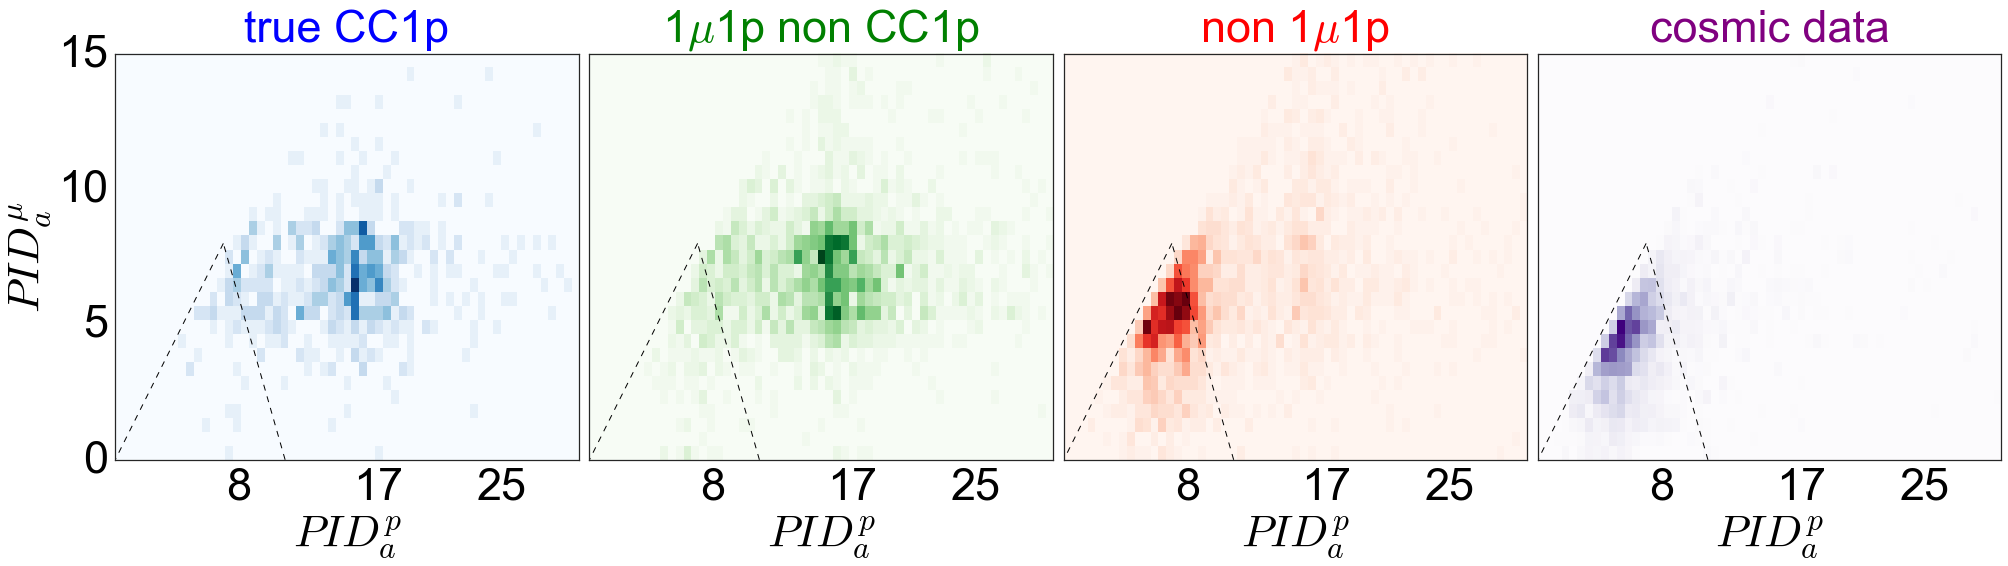

In [22]:
#traingle
lines_graphical_cut = do_graphical_cut(xy_pts = [[11.,0.],
                                                 [7.,8.],
                                                 [0.,0.], 
                                                 [11.,0.],
                                                ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')
# box
# lines_graphical_cut = do_graphical_cut(xy_pts = [[8.,2.],
#                                                  [8.,12.],
#                                                  [35.,12.], 
#                                                  [35.,2.], 
#                                                  [8.,2.],
#                                                 ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')


fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,60),np.linspace(0,15,30))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['PIDA_assigned_proton'], sample['PIDA_assigned_muon'], ax=ax,fontsize=figures_fontsize,ticks_color='white',bins=bins,cmap=cmap,norm='')            

    for i_line,line in enumerate(lines_graphical_cut):
        plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([8,17,25])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa_mu_p.pdf')

##### length

558 in sample 0 , 81  %
1933 in sample 1 , 76  %
2171 in sample 2 , 68  %
11963 in sample 3 , 62  %


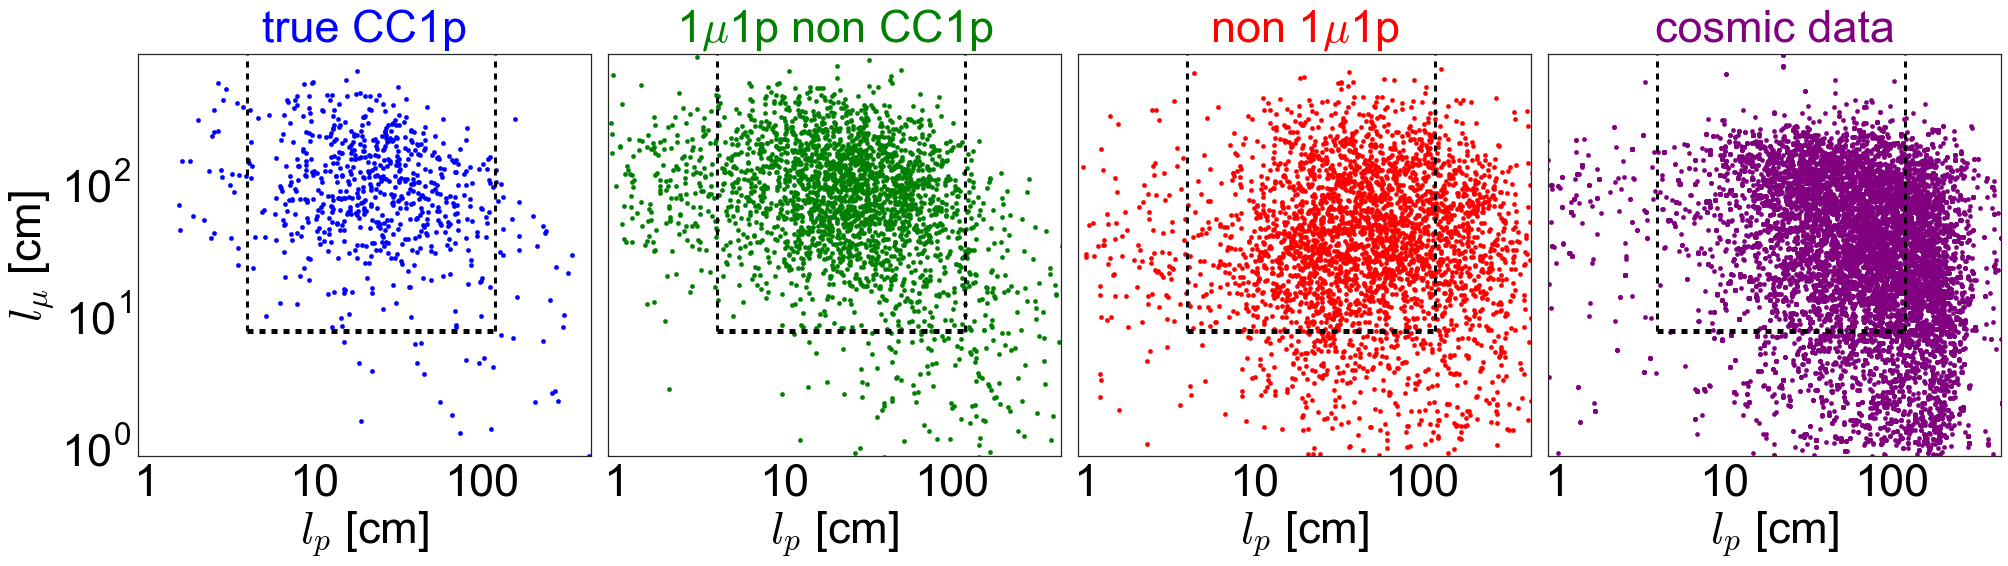

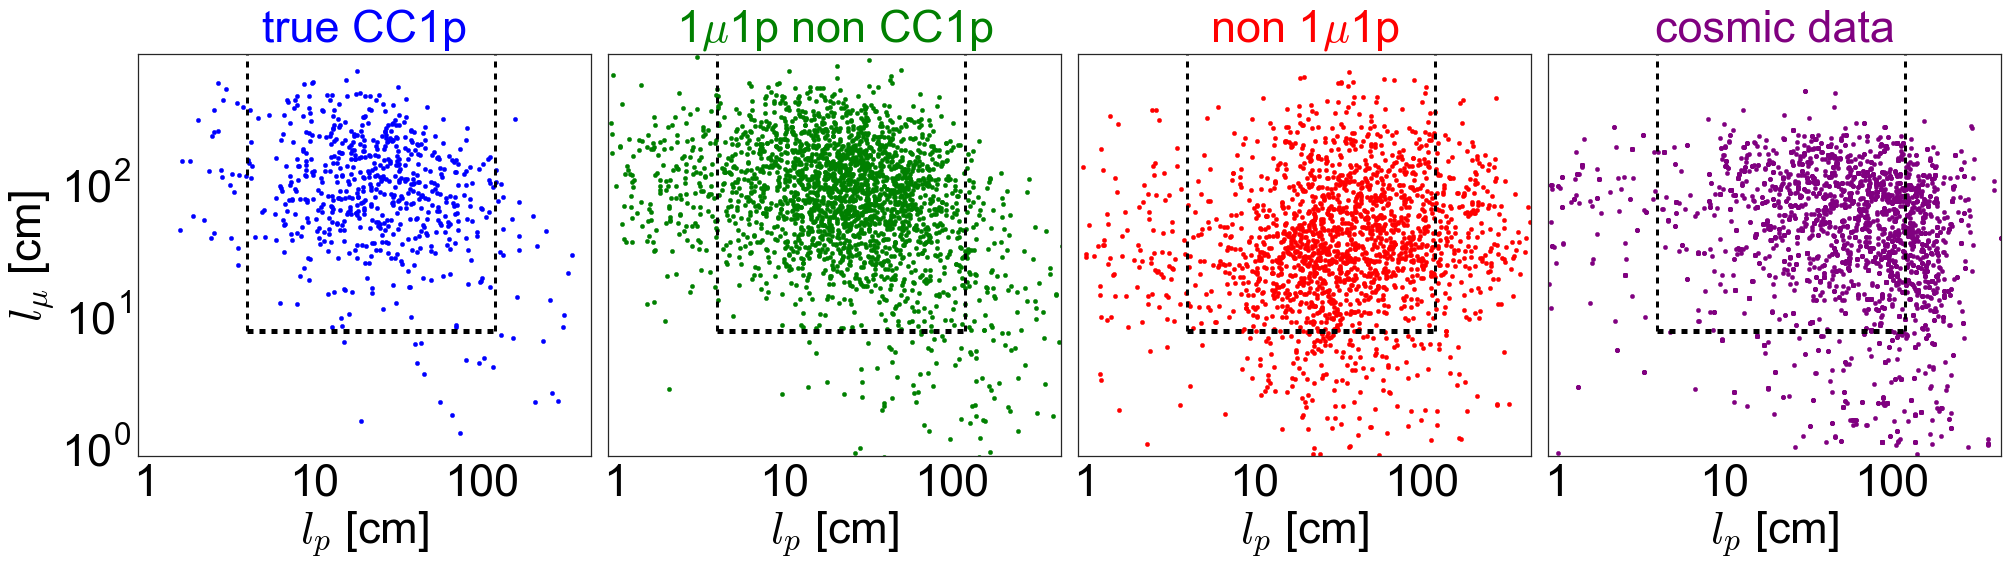

In [55]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,sample,label,cmap,color in zip(range(4),reduced_samples['no cuts'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    #     plot_2d_hist(sample['l_large_pida'], sample['l_small_pida'], ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap,norm='log')        
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'--',color='black',linewidth=5)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p.pdf')

# after cut-1
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 1'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'--',color='black',linewidth=5)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_1.pdf')

### no collinearity

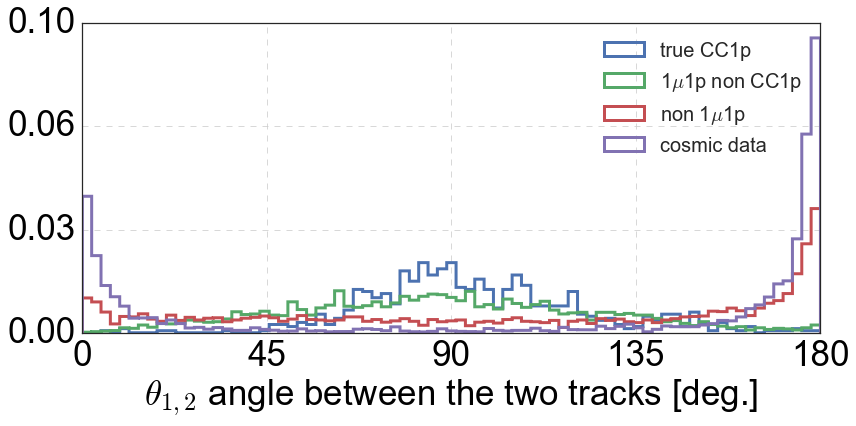

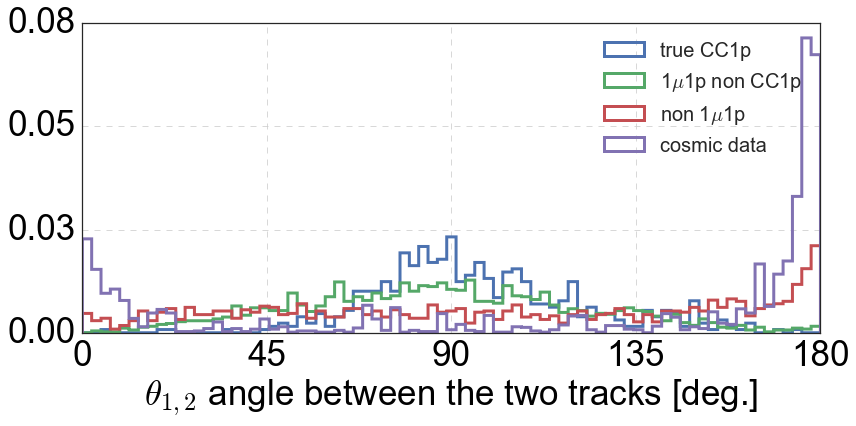

In [56]:
plot_feature_2tracks_clusters(samples=samples,labels=labels,var='2_tracks_angle',x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,80),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.savefig(figures_path+'angle_between_tracks.pdf')
# after cut 2
plot_feature_2tracks_clusters(samples=reduced_samples['cut 2'],labels=labels,var='2_tracks_angle',x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,80),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.savefig(figures_path+'angle_between_tracks_after_cut_2.pdf')

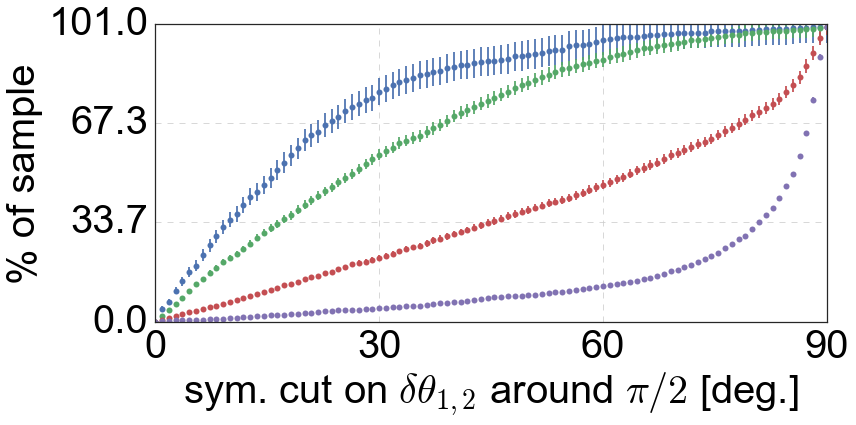

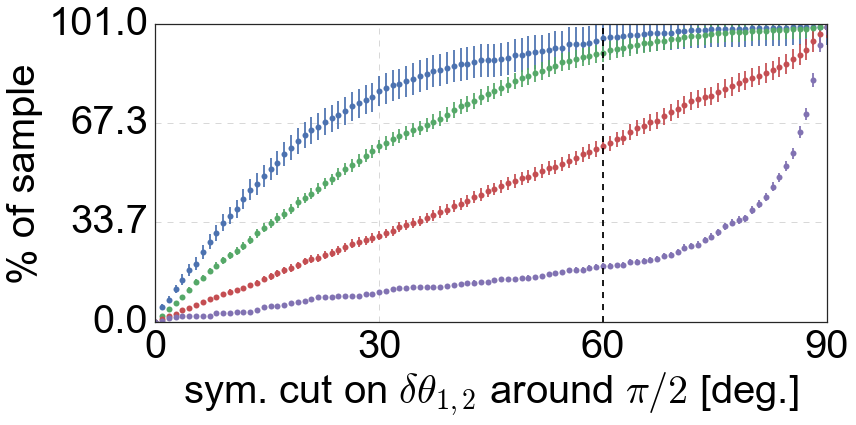

In [58]:
#reduced_samples['cut 3']
fig=plot_cut_samples(samples=reduced_samples['no cuts'],labels=labels,
                     cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='black',
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = 'sym. cut on $\\delta \\theta_{1,2}$ around $\\pi/2$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.savefig(figures_path+'angle_between_tracks_cuts.pdf')

# after cut 2
fig=plot_cut_samples(samples=reduced_samples['cut 2'],labels=labels,
                     cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='black',
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = 'sym. cut on $\\delta \\theta_{1,2}$ around $\\pi/2$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.savefig(figures_path+'angle_between_tracks_cuts_after_cut_2.pdf')
plt.plot([60,60],[0,100],'--',color='black')

reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
602 in sample 0 , 88  %
1318 in sample 1 , 52  %
1687 in sample 2 , 53  %
8563 in sample 3 , 44  %


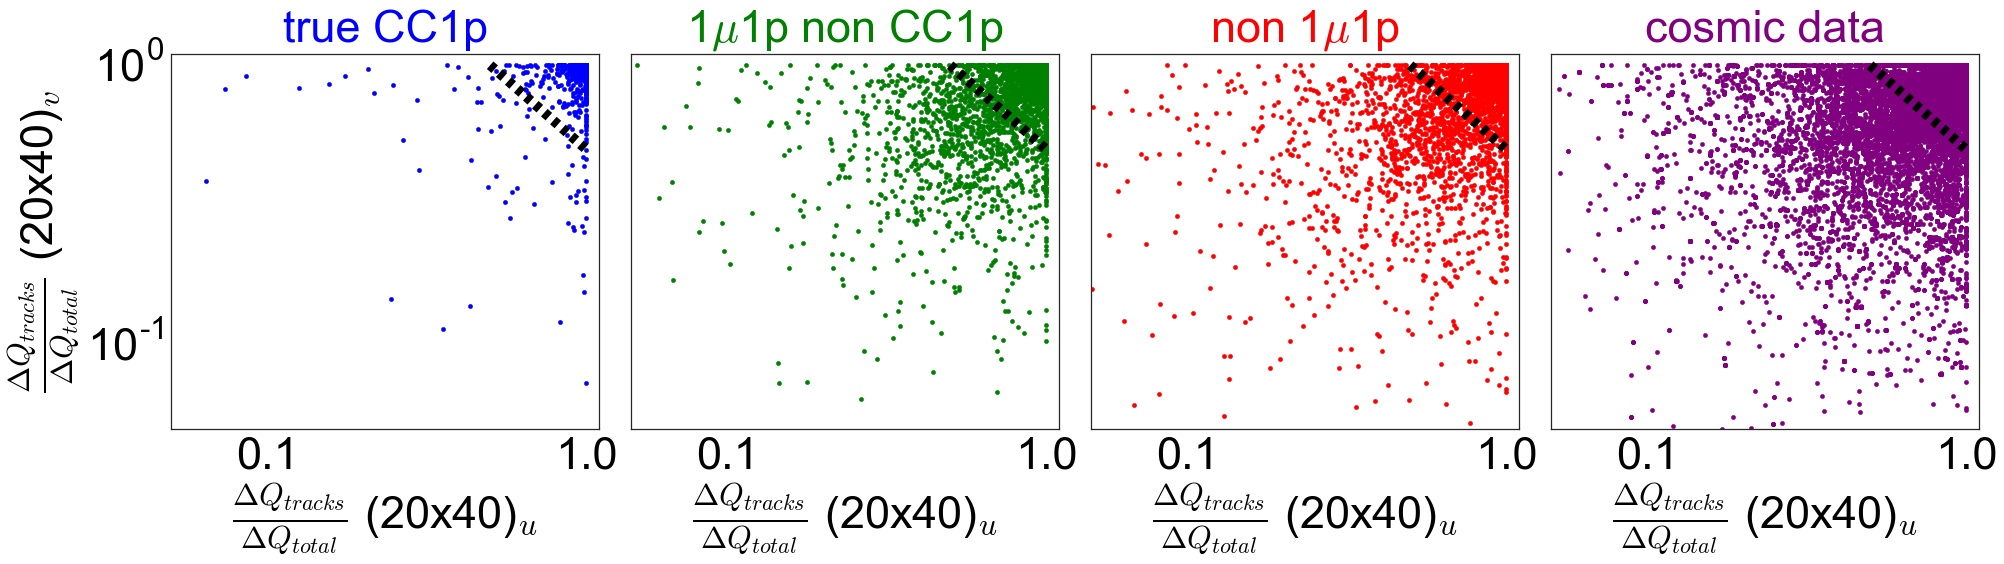

In [25]:
reduced_this_cut,frac=[],[]
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color,original_sample in zip(range(len(samples)),reduced_samples['no cuts'],labels,cmaps,colors,samples):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    #     plot_2d_hist(sample[varx],
    #                  sample[vary],ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap)
    ax.scatter(sample[varx], sample[vary],color=color)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)    
    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    x_array,y_array=[0.5,1.],[1.,0.5]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'--',color='black',linewidth=10)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    if i==0: print "reduced=reduced[reduced['%s']>%f*reduced['%s']+%f]"%(vary,slope,varx,intercept)
    red = sample
    red=red[red[vary]>slope*red[varx]+intercept]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()
fig.savefig(figures_path+'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_uv.pdf')

## theta_pq and \Delta \phi

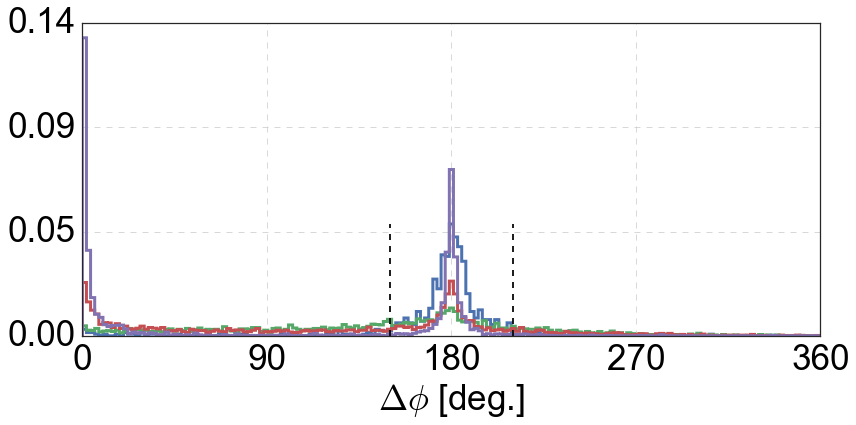

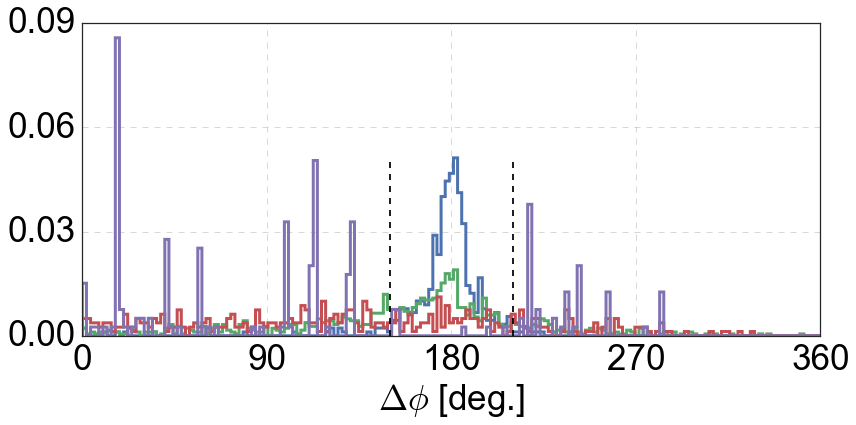

In [63]:
plot_feature_2tracks_clusters(samples=reduced_samples['no cuts'],labels=labels,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'--',color='black')
plt.plot([210,210],[0,0.05],'--',color='black')
plt.savefig(figures_path+'DeltaPhi.pdf')


# after cut 4
plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'--',color='black')
plt.plot([210,210],[0,0.05],'--',color='black')
plt.savefig(figures_path+'DeltaPhi_after_cut_4.pdf')




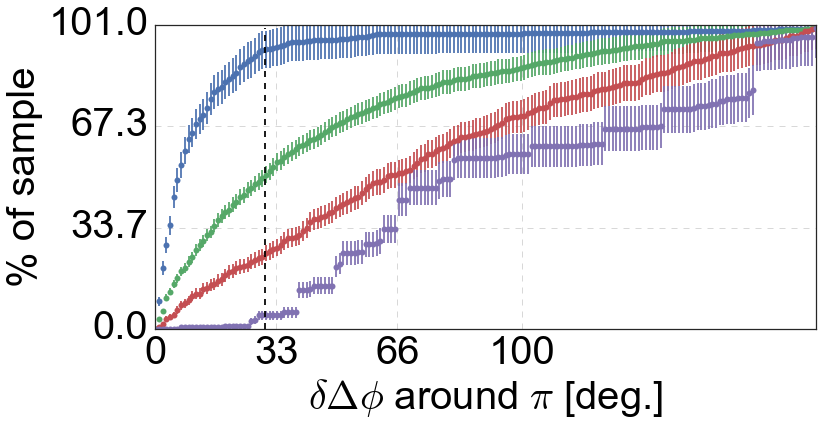

In [65]:
fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,do_add_legend=False
                     ,cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                 xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([30,30],[0,100],'--',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts.pdf')

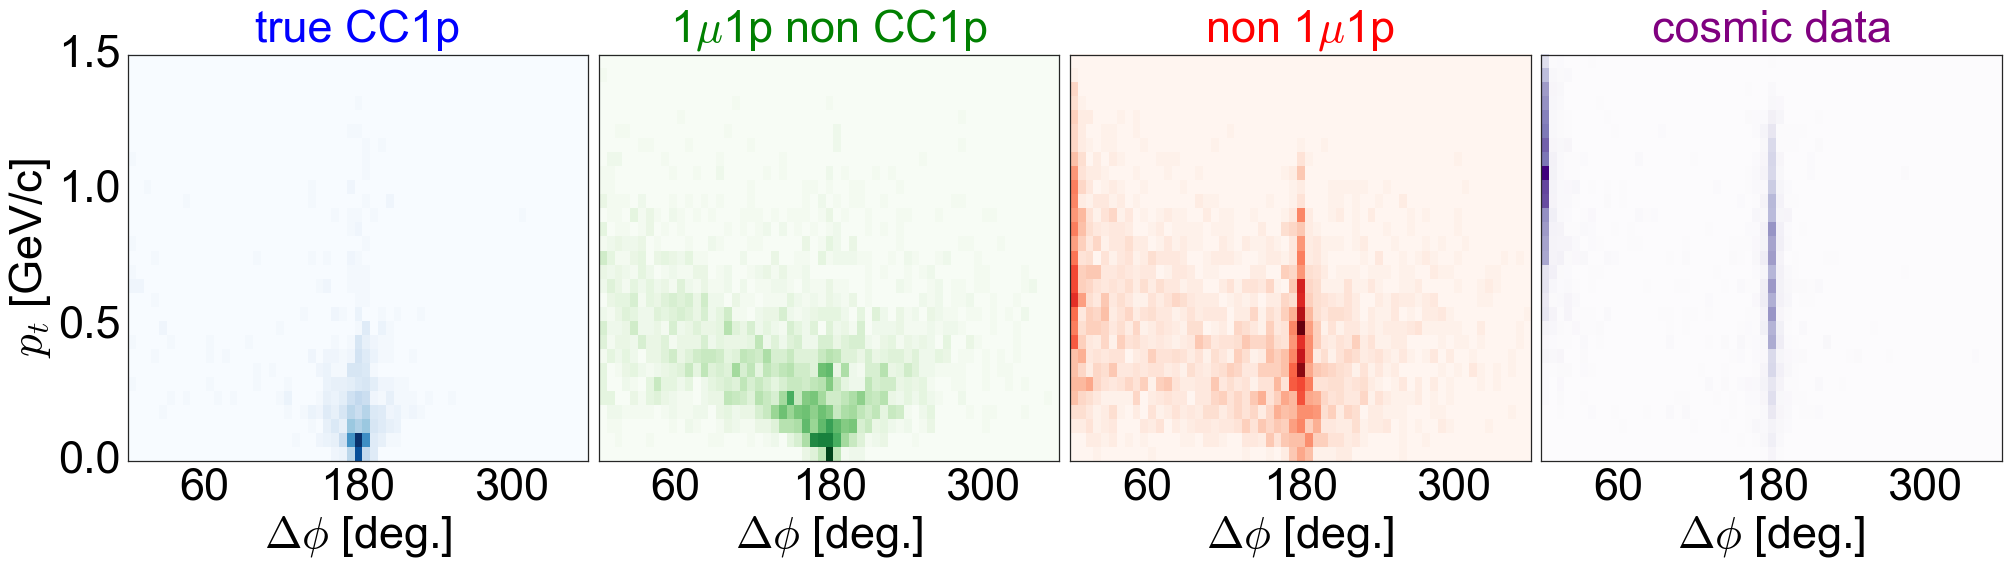

In [74]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,30))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt.pdf')

### \theta_pq

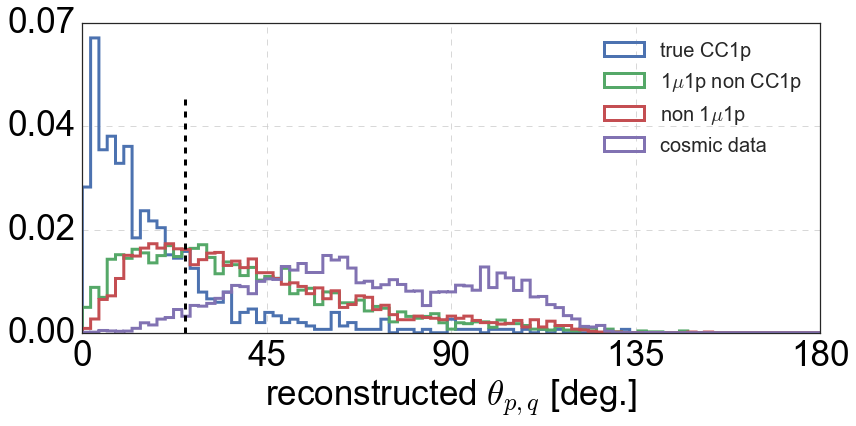

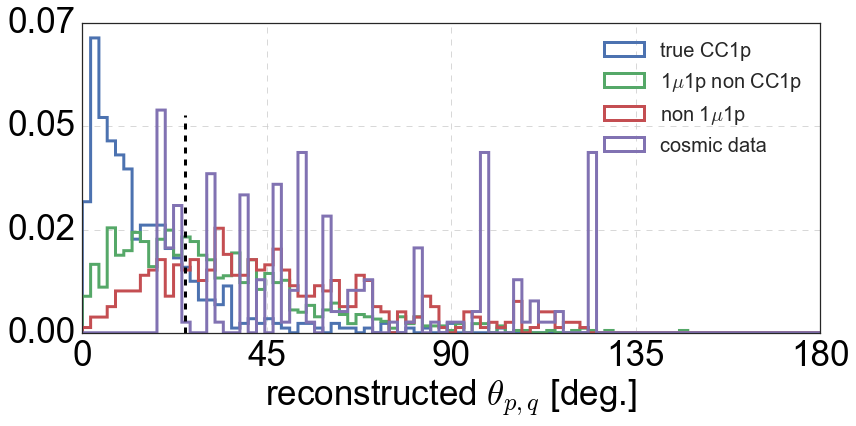

In [72]:
plot_feature_2tracks_clusters(samples=samples,labels=labels,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([25,25],[0,0.05],'--',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq.pdf')

# after cut 4
plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([25,25],[0,0.05],'--',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq_after_cut_4.pdf')

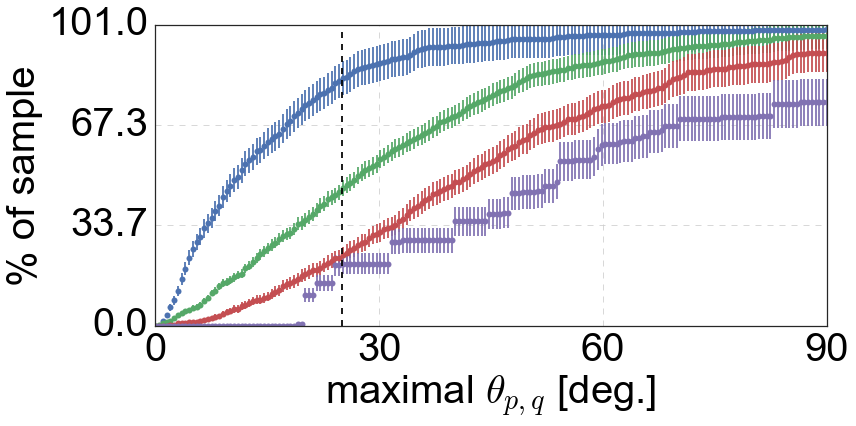

In [71]:
# fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,do_add_legend=False
#                      ,cut_var ='delta_phi',cut_type= 'max',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black')

fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,do_add_legend=False,mul=1
                 ,cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6));
plt.plot([25,25],[0,100],'--',color='black')
plt.savefig(figures_path+'theta_pq_cuts.pdf')

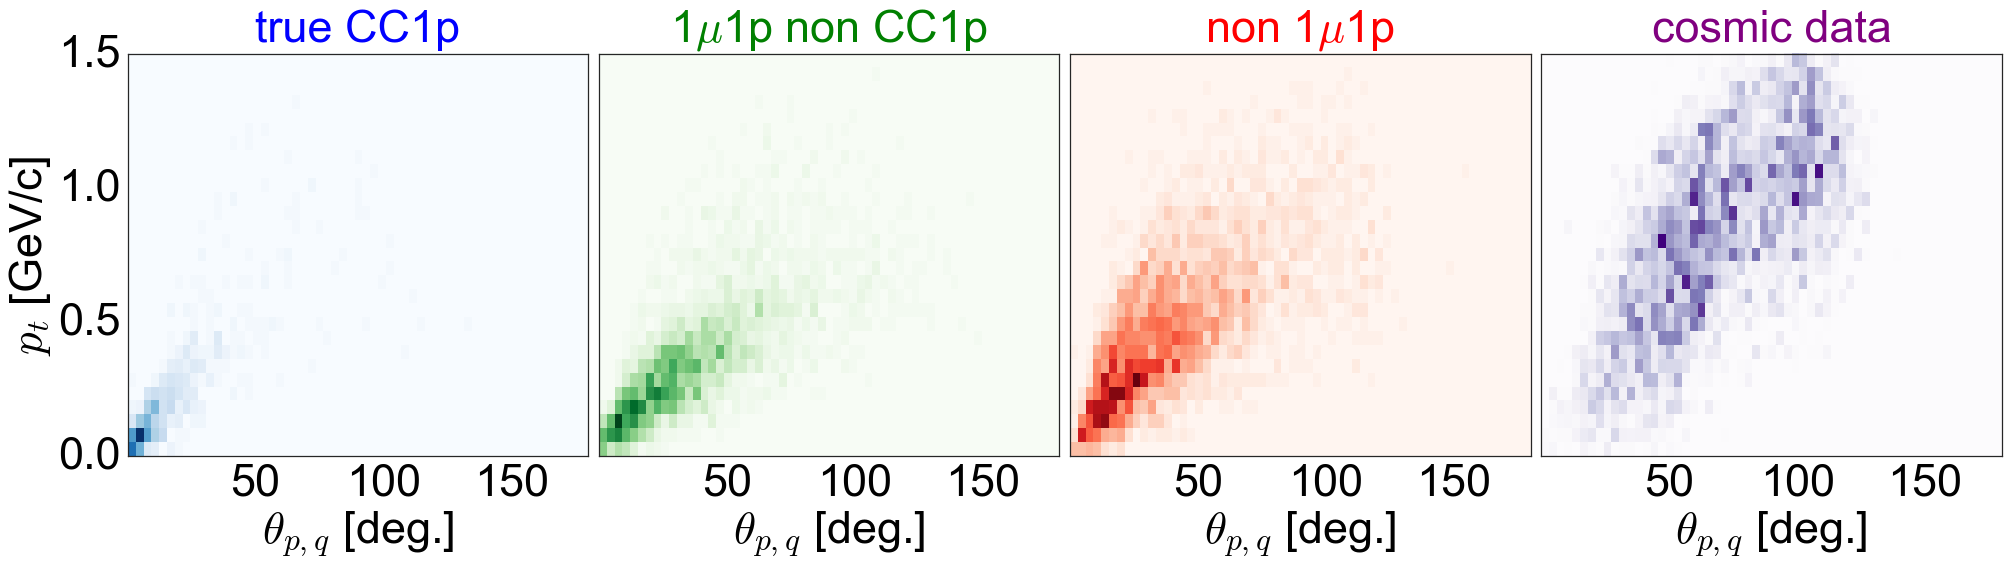

In [76]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,180,60),np.linspace(0,1.5,30))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([50,100,150])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt.pdf')

314 in sample 0 , 84  %
233 in sample 1 , 67  %
32 in sample 2 , 67  %
1 in sample 3 , 100  %
efficiency: 84.0 %
purity: 54.1 %


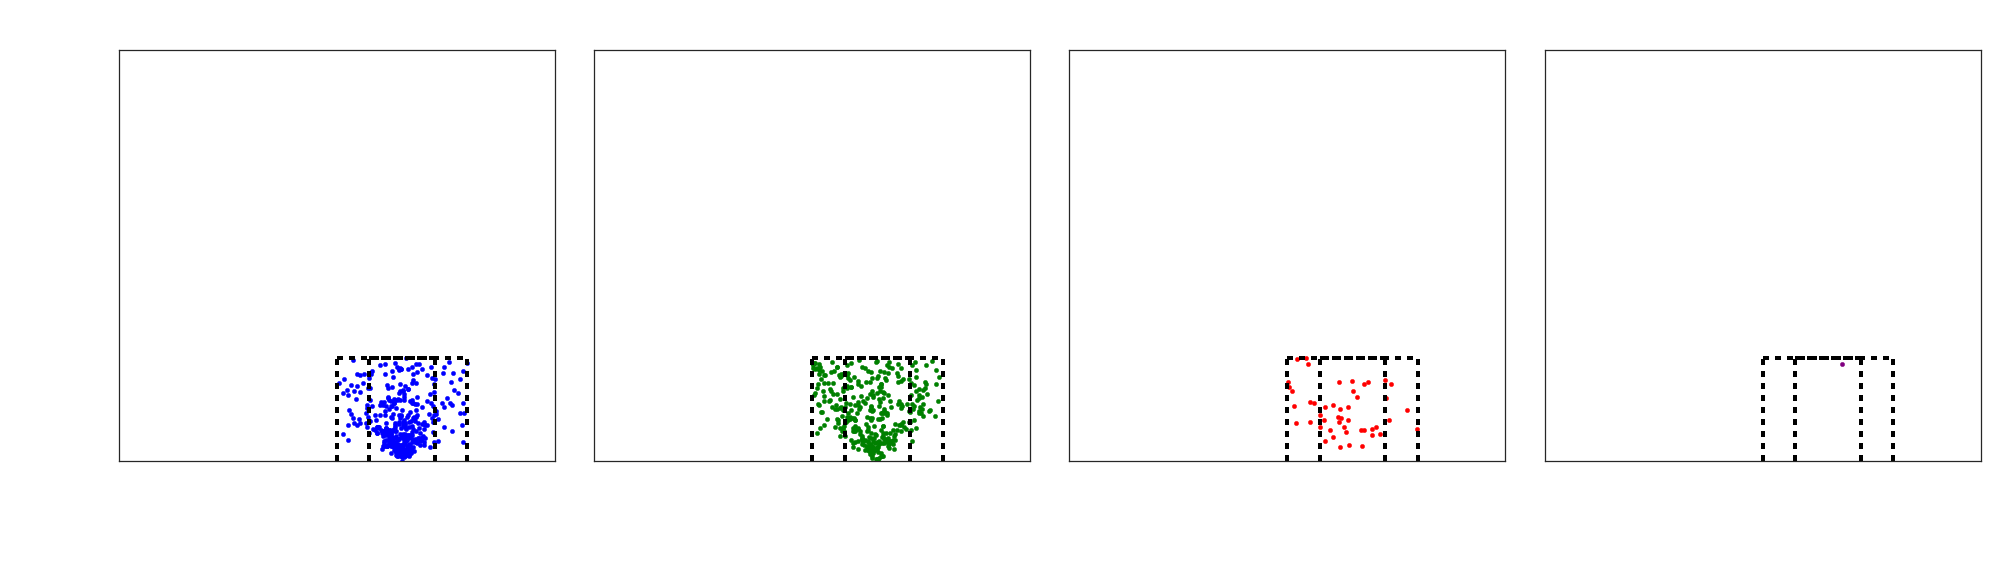

In [913]:
# theta_pq vs. \Delta \phi
# second plot - after applied cuts
reduced_this_cut,frac=[],[]
bins=(np.linspace(100,260,60),np.linspace(0,80,60))
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,original_sample,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,samples,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=40,y=1.02,color='white')
#     plot_2d_hist(sample['delta_phi'],sample['reco_CC1p_theta_pq_corrected'],ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')    
    plt.scatter(sample['delta_phi'],sample['reco_CC1p_theta_pq_fromE'],color=color)
    red = sample
    
    plt.plot([180-30,180+30],[25,25],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<25]

    plt.plot([180-30,180-30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>180-30]

    plt.plot([180+30,180+30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<180+30]
    
    delta_phi_min , delta_phi_max , theta_pq_max = 165 , 195 , 25
    
    plt.plot([delta_phi_min , delta_phi_max],[theta_pq_max,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<theta_pq_max]

    plt.plot([delta_phi_min,delta_phi_min],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>delta_phi_min]

    plt.plot([delta_phi_max,delta_phi_max],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<delta_phi_max]

    
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label='$\\Delta \\phi$ [deg.]', y_label='$\\theta_{p,q}$ [deg.]' if i==0 else '',ticks_color='white',fontsize=45)    
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    ax.xaxis.set_ticks([60,120,180,240]);ax.yaxis.set_ticks([0,25,50,75]);
    ax.set_xlim(50,250);ax.set_ylim(0,100);

plt.tight_layout()
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'

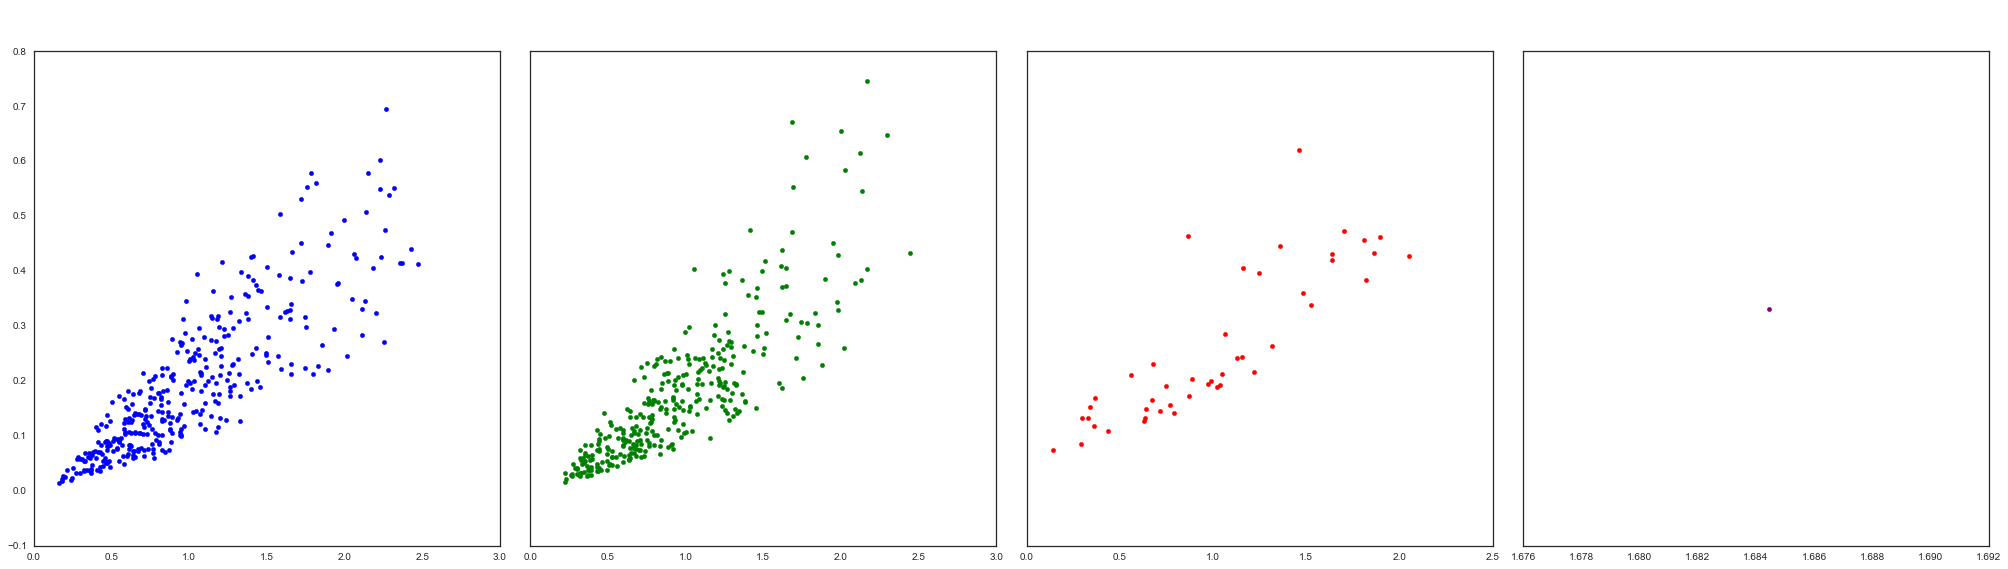

In [85]:
# x_B vs. W2
# second plot - after applied cuts
reduced_this_cut,frac=[],[]
bins=(np.linspace(100,260,60),np.linspace(0,80,60))
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,original_sample,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,samples,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=40,y=1.02,color='white')
    plt.scatter(sample['reco_CC1p_Pmu_theta'],sample['reco_CC1p_y_fromE']*sample['reco_CC1p_Xb_fromE'],color=color)
#     red = sample
#     delta_phi_min , delta_phi_max , theta_pq_max = 165 , 195 , 25
#     plt.plot([delta_phi_min , delta_phi_max],[theta_pq_max,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['reco_CC1p_theta_pq_fromE']<theta_pq_max]
#     plt.plot([delta_phi_min,delta_phi_min],[0,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['delta_phi']>delta_phi_min]
#     plt.plot([delta_phi_max,delta_phi_max],[0,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['delta_phi']<delta_phi_max]
    
#     f = 100.*float(len(red))/len(sample)
#     reduced_this_cut.append(red)
#     frac.append(f)
#     print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
#     set_axes(ax,x_label='$\\Delta \\phi$ [deg.]', y_label='$\\theta_{p,q}$ [deg.]' if i==0 else '',ticks_color='white',fontsize=45)    
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
#     ax.xaxis.set_ticks([60,120,180,240]);ax.yaxis.set_ticks([0,25,50,75]);
#     ax.set_xlim(50,250);ax.set_ylim(0,100);
plt.tight_layout()
# purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
# print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'